## Observations and Insights 

In [2]:
%matplotlib notebook

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
#import scipy.stats as st
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the DataFrame.
number_of_dup_mice_df = combined_data_df["Mouse ID"].count()
print("Duplicates:", number_of_dup_mice_df)

number_mice_count_df = combined_data_df["Mouse ID"].nunique()
print("Number of Mice:", number_mice_count_df)

Duplicates: 1893
Number of Mice: 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
number_of_dup_mice_df = combined_data_df.groupby("Mouse ID")["Timepoint"].nunique()
number_of_dup_mice_df

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_drop = combined_data_df.drop_duplicates(subset="Mouse ID", keep="last")
# Checking the number of mice in the clean DataFrame.
print(number_mice_count_df)
combined_data_drop.head()


249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

mean_tumor = combined_data_drop.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
median_tumor = combined_data_drop.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
variance_tumor = combined_data_drop.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
std_tumor = combined_data_drop.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
sem_tumor = combined_data_drop.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

summary_stats_table =pd.DataFrame({'Mean of Tumor Volume':mean_tumor,
                          'Median of Tumor Volume':median_tumor,
                          'Variance of Tumor Volume':variance_tumor,
                          'STD of Tumor Volume':std_tumor,
                          'SEM of Tumor Volume': sem_tumor})

summary_stats_table.round(2)

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Bar Plots

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drugs_total = pd.DataFrame(pd.value_counts(combined_data_df["Drug Regimen"]))
drugs_total


,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,161


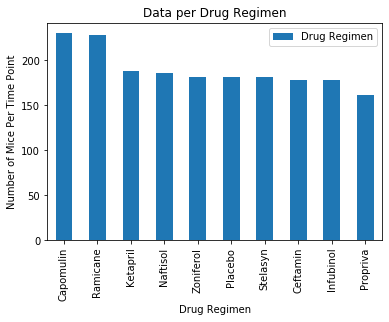

<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib inline
# pandas plot
drugs_total.plot(kind = "bar")
plt.title("Data per Drug Regimen")
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

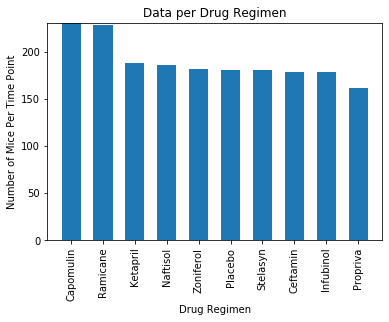

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = combined_data_df["Drug Regimen"].value_counts().index
y_axis = combined_data_df["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis, width = .6)
plt.xticks(x_axis, rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+0.4)
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.title("Data per Drug Regimen")
plt.show()

## Pie Plots

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_total = pd.value_counts(combined_data_drop['Sex'])
gender_total


Male      125
Female    124
Name: Sex, dtype: int64

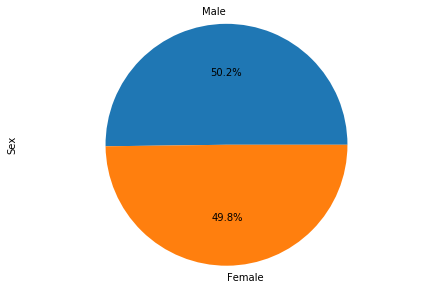

In [13]:
#pandas pie plot
gender_pandas = gender_total.plot(kind="pie", y="sex", autopct='%1.1f%%')
gender_pandas.set_ylabel("Sex")

plt.tight_layout()
plt.axis("equal")
plt.show()

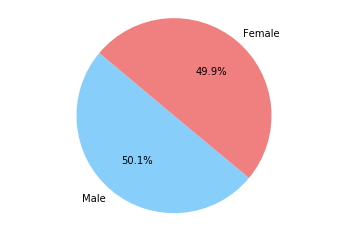

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [325, 324]
plt.pie(
    sizes, 
    labels=["Male","Female"],          
    colors=["lightskyblue","lightcoral"],
    autopct='%1.1f%%',                                         # Formats percentages
    startangle=140
)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#Look for the smallest turmor mean volume to show the most promising treatment regimens.
summary_stats_table_assort_df = summary_stats_table.sort_values("Mean of Tumor Volume", ascending=True)
summary_stats_table_assort_df



,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417


In [16]:
# Get the Regimen drug data
Capomulin = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Capomulin"]
Ramicane = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Ramicane"]
Propriva = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Propriva"]
Ceftamin = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Ceftamin"]
x_axisC = Capomulin["Tumor Volume (mm3)"]
x_axisR = Ramicane["Tumor Volume (mm3)"]
x_axisP = Propriva["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]

#Capomulin
quartiles_C = x_axisC.quantile([.25,.5,.75])
lowerq_C = quartiles_C[0.25]
upperq_C = quartiles_C[0.75]
iqr_C = upperq_C-lowerq_C
lower_bound_C = lowerq_C - (1.5*iqr_C)
upper_bound_C = upperq_C + (1.5*iqr_C)
print("Drug: Capomulin")
print(quartiles_C)
print(lowerq_C)
print(upperq_C)
print(iqr_C)
print(f"Values below {lower_bound_C} could be outliers.")
print(f"Values above {upper_bound_C} could be outliers.")

#Ramicane
quartiles_R = x_axisR.quantile([.25,.5,.75])
lowerq_R = quartiles_R[0.25]
upperq_R = quartiles_R[0.75]
iqr_R = upperq_R-lowerq_R
lower_bound_R = lowerq_R - (1.5*iqr_R)
upper_bound_R = upperq_R + (1.5*iqr_R)
print("Drug: Ramicane")
print(quartiles_R)
print(lowerq_R)
print(upperq_R)
print(iqr_R)
print(f"Values below {lower_bound_R} could be outliers.")
print(f"Values above {upper_bound_R} could be outliers.")

#Propriva
quartiles_P = x_axisP.quantile([.25,.5,.75])
lowerq_P = quartiles_P[0.25]
upperq_P = quartiles_P[0.75]
iqr_P = upperq_P-lowerq_P
lower_bound_P = lowerq_P - (1.5*iqr_P)
upper_bound_P = upperq_P + (1.5*iqr_P)
print("Drug: Propriva")
print(quartiles_P)
print(lowerq_P)
print(upperq_P)
print(iqr_P)
print(f"Values below {lower_bound_P} could be outliers.")
print(f"Values above {upper_bound_P} could be outliers.")

#Ceftamin
quartiles_Ce = x_axisCe.quantile([.25,.5,.75])
lowerq_Ce = quartiles_Ce[0.25]
upperq_Ce = quartiles_Ce[0.75]
iqr_Ce = upperq_Ce-lowerq_Ce
lower_bound_Ce = lowerq_Ce - (1.5*iqr_Ce)
upper_bound_Ce = upperq_Ce + (1.5*iqr_Ce)
print("Drug: Ceftamin")
print(quartiles_Ce)
print(lowerq_Ce)
print(upperq_Ce)
print(iqr_Ce)
print(f"Values below {lower_bound_Ce} could be outliers.")
print(f"Values above {upper_bound_Ce} could be outliers.")


Drug: Capomulin
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
32.37735684
40.1592203
7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Drug: Ramicane
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
31.56046955
40.65900627
9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Drug: Propriva
0.25    49.122969
0.50    55.841410
0.75    62.570880
Name: Tumor Volume (mm3), dtype: float64
49.12296898
62.57087961
13.447910629999996
Values below 28.95110303500001 could be outliers.
Values above 82.742745555 could be outliers.
Drug: Ceftamin
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
48.72207785
64.29983003
15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


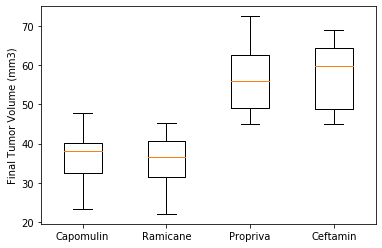

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot([x_axisC, x_axisR, x_axisP, x_axisCe])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Propriva", "Ceftamin"])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

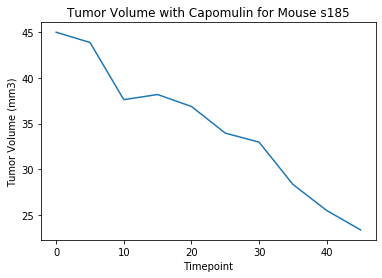

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis =combined_data_df.loc[combined_data_df["Mouse ID"]== "s185"]
x_axis = x_axis["Timepoint"]

y_axis =combined_data_df.loc[combined_data_df["Mouse ID"]== "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume with Capomulin for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight_capomulin = combined_data_drop.loc[combined_data_drop["Drug Regimen"]== "Capomulin"]
mouse_weight_capomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2


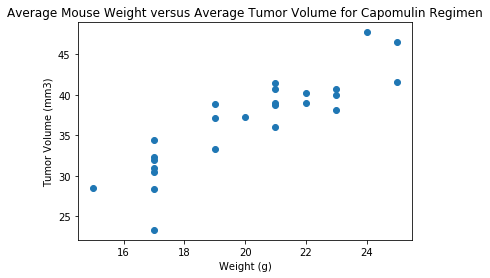

In [23]:
mouse_weight = mouse_weight_capomulin["Weight (g)"]
tumor_volume = mouse_weight_capomulin["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volume)
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both weight and tumor volume is 0.88


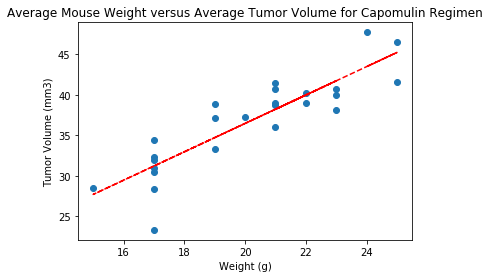

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = stats.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between both weight and tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(mouse_weight, tumor_volume)
regress_values = slope * mouse_weight + intercept
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, regress_values, "--", color="r")
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()